<a href="https://colab.research.google.com/github/NadiaCarvalho/Audio-Collabs/blob/main/MIDI_Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, install all needed dependencies: Musescore and Lilypond software to see musical scores and pygame to listen to midi.



In [45]:
# Install Dependencies
print('Installing dependencies...')
!apt-get update -qq && apt-get install -qq musescore lilypond

!pip install -qU pygame
!pip install -qU PyMarkovChain

%env QT_QPA_PLATFORM=offscreen
%env SDL_AUDIODRIVER='dsp'

Installing dependencies...
env: QT_QPA_PLATFORM=offscreen
env: SDL_AUDIODRIVER='dsp'


In [30]:
# Set up to Generate Music Notation
import music21

env = music21.environment.Environment()
env['lilypondPath'] = '/usr/local/bin/lilypond'

env['pdfPath'] = '/usr/bin/musescore'
env['graphicsPath'] = '/usr/bin/musescore'

env['musicxmlPath'] = '/usr/bin/musescore'
env['musescoreDirectPNGPath'] = '/usr/bin/musescore'

print('Environment settings:')
print('lilypond: ', env['lilypondPath'])
print('musicXML: ', env['musicxmlPath'])
print('musescore: ', env['musescoreDirectPNGPath'])

Environment settings:
lilypond:  /usr/local/bin/lilypond
musicXML:  /usr/bin/musescore
musescore:  /usr/bin/musescore


Then, load a score.

As a Musical Score


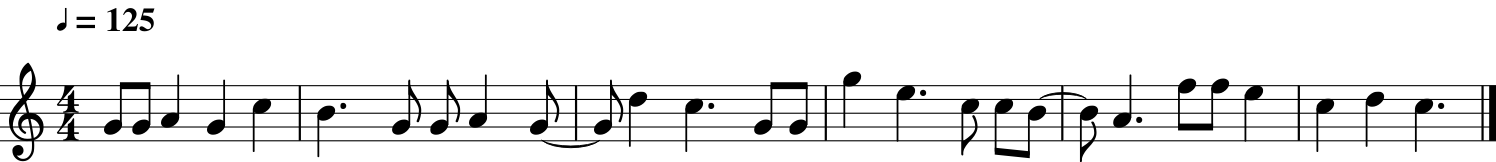



As a Piano Roll


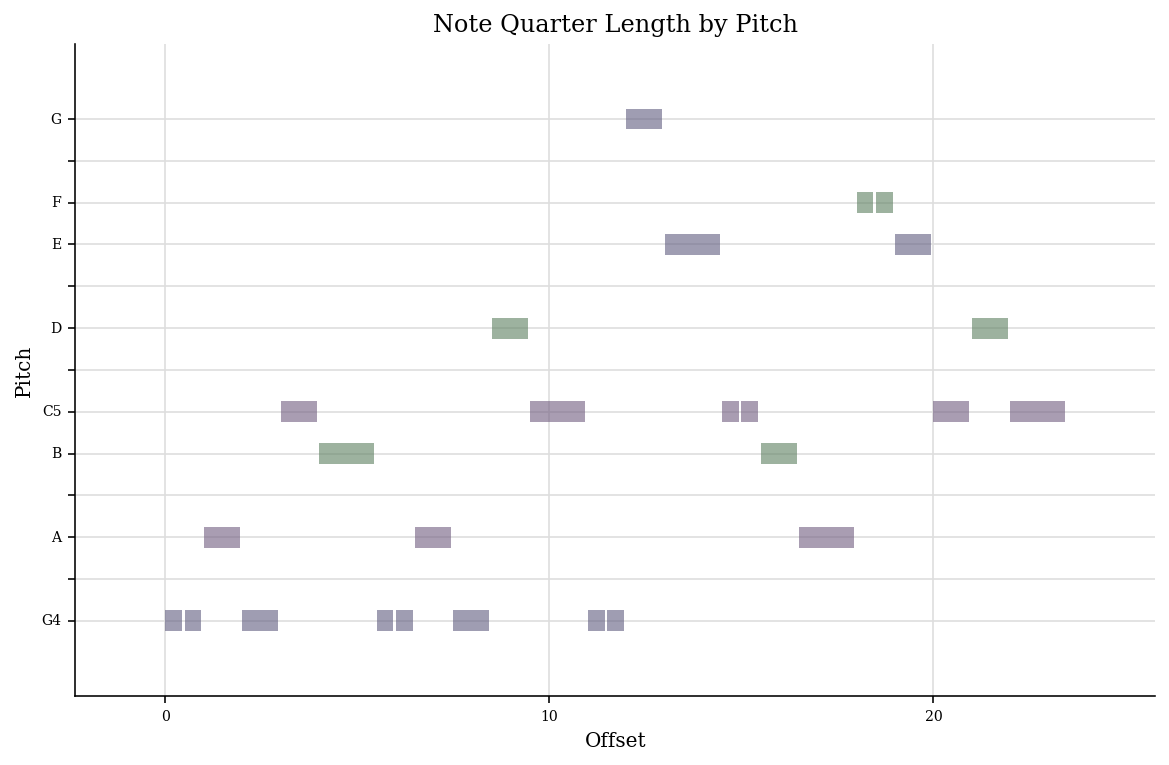

In [35]:
%matplotlib inline 
from music21 import converter, midi

print('As a Musical Score')
music = converter.parse('/content/happy-birthday.mid')
music.show()

print('\n\nAs a Piano Roll')
music.plot('pianoroll')

# Play MIDI
# print('As MIDI')
# sp = midi.realtime.StreamPlayer(music)
# sp.play()

Get a list of pitches in the music

In [61]:
notes = music.flat.notes
print(notes)

<music21.stream.iterator.StreamIterator for Score:0x7fae8af8e160_flat @:27>


In [62]:
m_notes = [note.nameWithOctave + '-' + note.duration.type for note in notes]
print(m_notes)

['G4-eighth', 'G4-eighth', 'A4-quarter', 'G4-quarter', 'C5-quarter', 'B4-quarter', 'G4-eighth', 'G4-eighth', 'A4-quarter', 'G4-quarter', 'D5-quarter', 'C5-quarter', 'G4-eighth', 'G4-eighth', 'G5-quarter', 'E5-quarter', 'C5-eighth', 'C5-eighth', 'B4-quarter', 'A4-quarter', 'F5-eighth', 'F5-eighth', 'E5-quarter', 'C5-quarter', 'D5-quarter', 'C5-quarter']


In [64]:
from pymarkovchain import MarkovChain

# Create an instance of the markov chain, tell it where to load / save its database
mc = MarkovChain()
# generate the markov chain's language model
mc.generateDatabase(" ".join(m_notes))

In [67]:
# generate new musical sequence from Markov Chain
new_seq = mc.generateString()
print(new_seq)

G4-eighth A4-quarter G4-quarter D5-quarter C5-quarter G4-eighth G4-eighth G5-quarter E5-quarter C5-eighth C5-eighth B4-quarter A4-quarter F5-eighth F5-eighth E5-quarter C5-quarter D5-quarter C5-quarter


As a Musical Score


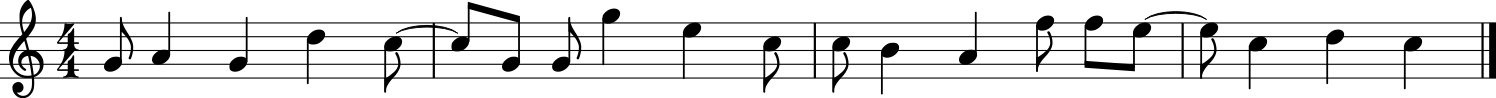



As a Piano Roll


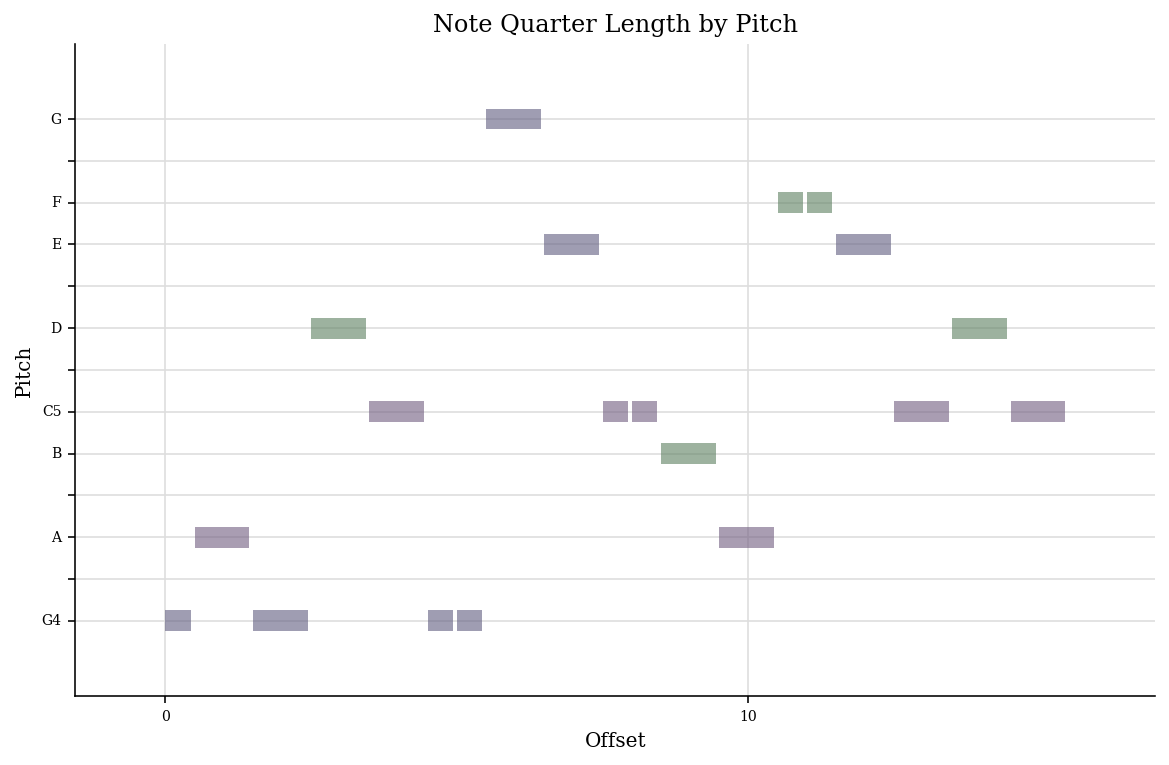

In [68]:
# Transform Pitch Sequence into music21 Stream

from music21 import stream, note

new_music = stream.Stream()

for m_note in new_seq.split(" "):
  pitch = m_note.split("-")[0]
  duration = m_note.split("-")[1]
  new_music.append(note.Note(pitch, type=duration))

print('As a Musical Score')
new_music.show()

print('\n\nAs a Piano Roll')
new_music.plot('pianoroll')
